In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

C:\Users\nbk863\AppData\Local\Temp\ipykernel_7392\2007051729.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# Setup

In [2]:
model = BabyMAKROModelClass(name='baseline')

In [3]:
par = model.par
ss = model.ss
sol = model.sol

# Find IRF

In [4]:
shock1 = ['chi']
shock2 = ['P_F','P_M_C','P_M_G','P_M_I','P_M_X']
Tshock = 50
persistence = 0.80**np.arange(Tshock)
shock_1_size = 0.01
Modellist = model.multi_shock_model(Tshock,persistence,shock_1_size,shock1,0.5*shock_1_size,shock2)

Jacobian calculated in 58.9 secs
initial:
t1-t0 = 0.01199 secs
it = 3
    max. abs. error = 5.98e-11
    2.65e-12 in A_R_ini_error
    7.02e-14 in Aq_diff
    9.07e-13 in FOC_capital_agency
    6.87e-13 in FOC_K_ell
    5.98e-11 in mkt_clearing
    8.88e-14 in PC

solve: t1-t0 = 0.09049 secs
evaluate + update: t3-t2 = 0.06476 secs
initial:
t1-t0 = 0.02393 secs
it = 3
    max. abs. error = 3.14e-12
    7.06e-14 in A_R_ini_error
    3.11e-15 in Aq_diff
    1.78e-14 in FOC_capital_agency
    2.46e-13 in FOC_K_ell
    3.14e-12 in mkt_clearing
    3.47e-14 in PC

solve: t1-t0 = 0.09175 secs
evaluate + update: t3-t2 = 0.06582 secs
initial:
t1-t0 = 0.02394 secs
it = 3
    max. abs. error = 2.64e-12
    7.34e-13 in A_R_ini_error
    6.22e-15 in Aq_diff
    1.36e-13 in FOC_capital_agency
    3.21e-13 in FOC_K_ell
    2.64e-12 in mkt_clearing
    3.46e-14 in PC

solve: t1-t0 = 0.08776 secs
evaluate + update: t3-t2 = 0.06682 secs


## Figures

### Long-view

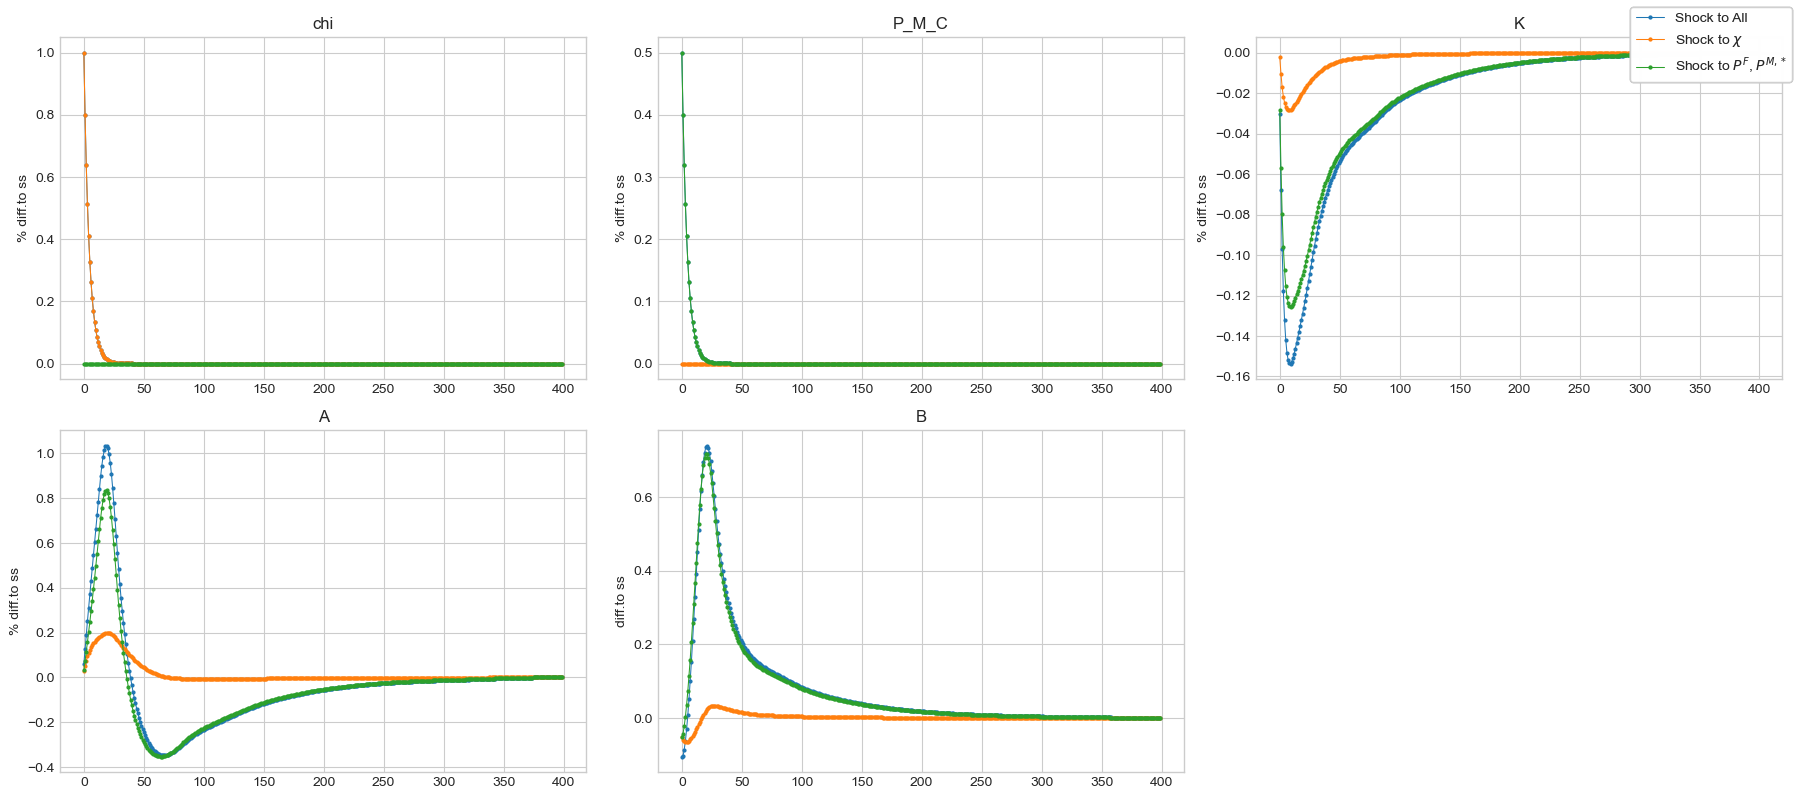

In [5]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['chi','P_M_C','K','A','B'],ncol=3,T_IRF=par.T)

### National accouting - quantities

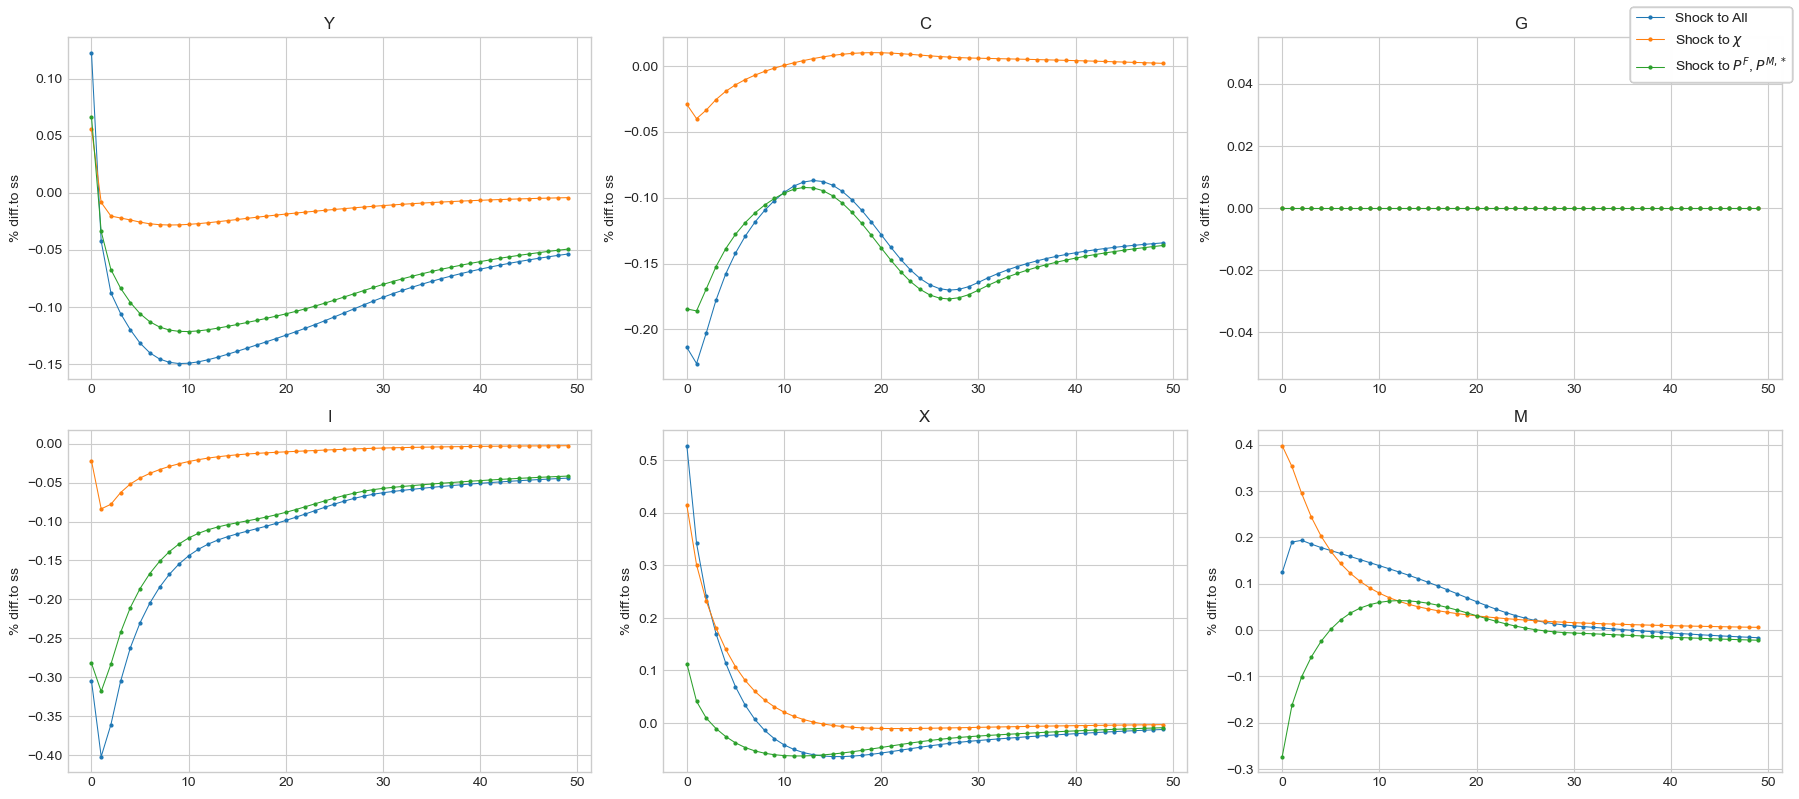

In [6]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','C','G','I','X','M'])

### National accouting - prices

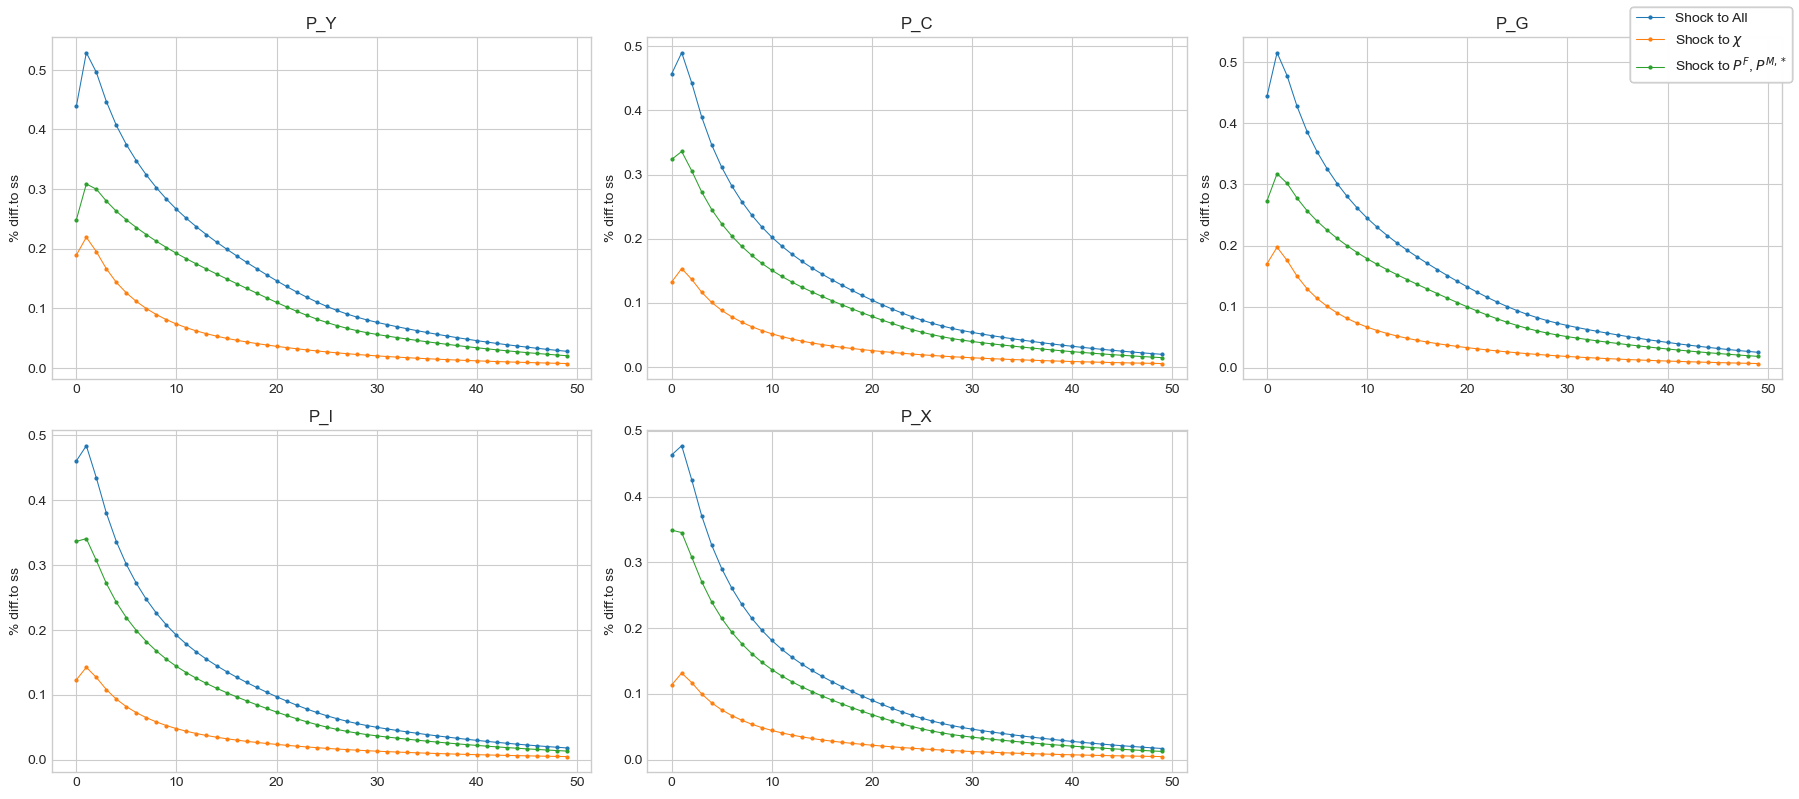

In [7]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['P_Y','P_C','P_G','P_I','P_X'])

### Import Prices

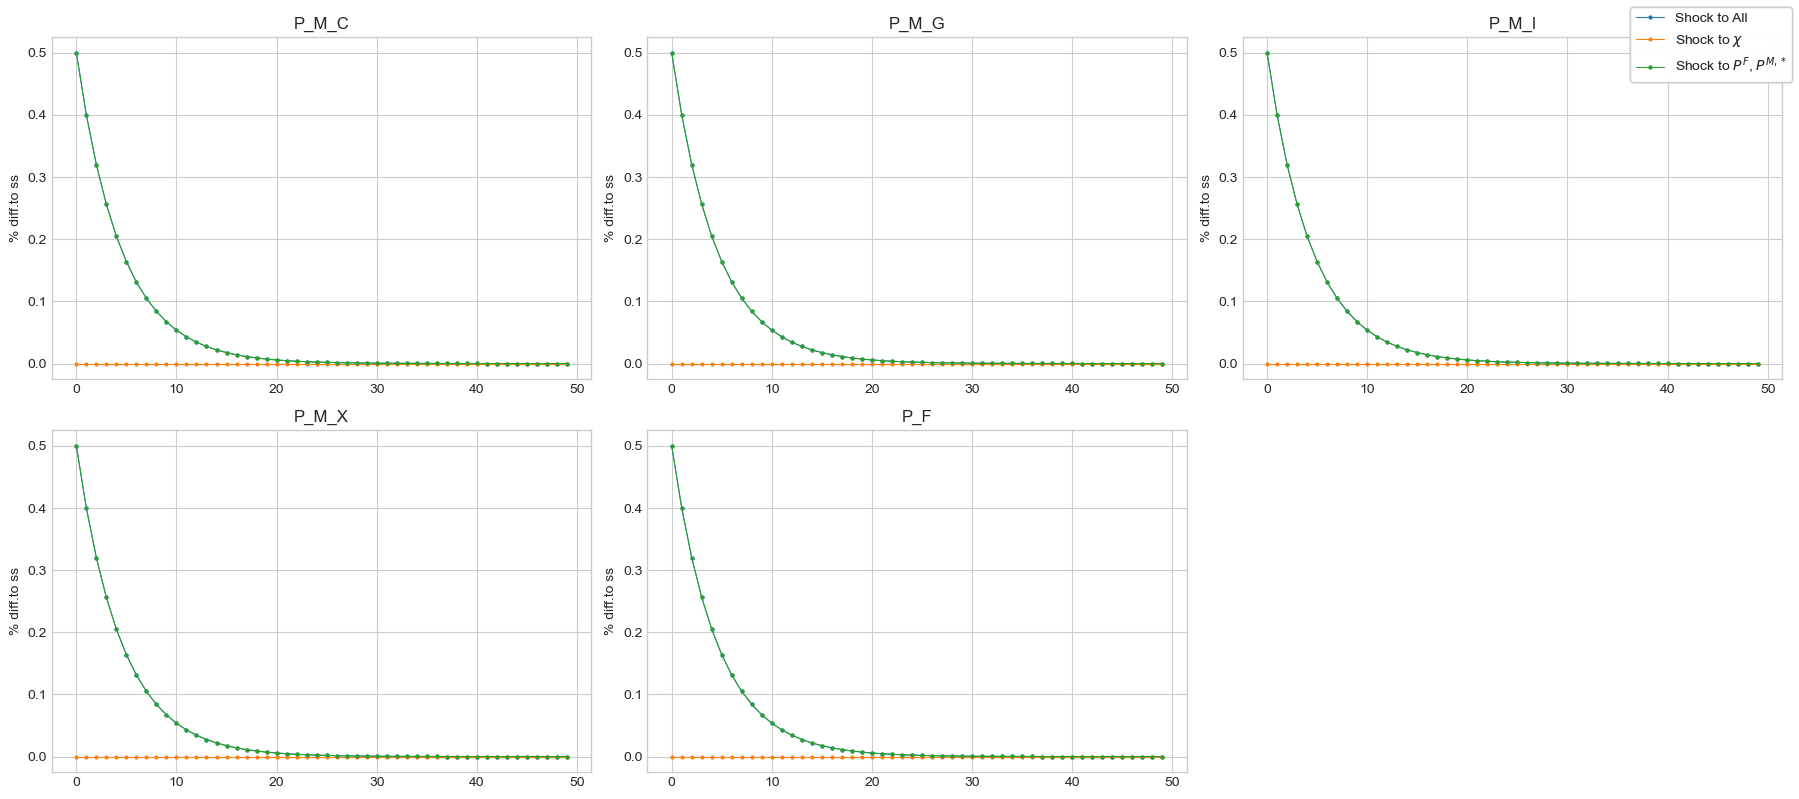

In [8]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['P_M_C','P_M_G','P_M_I','P_M_X','P_F'])

### Labor market

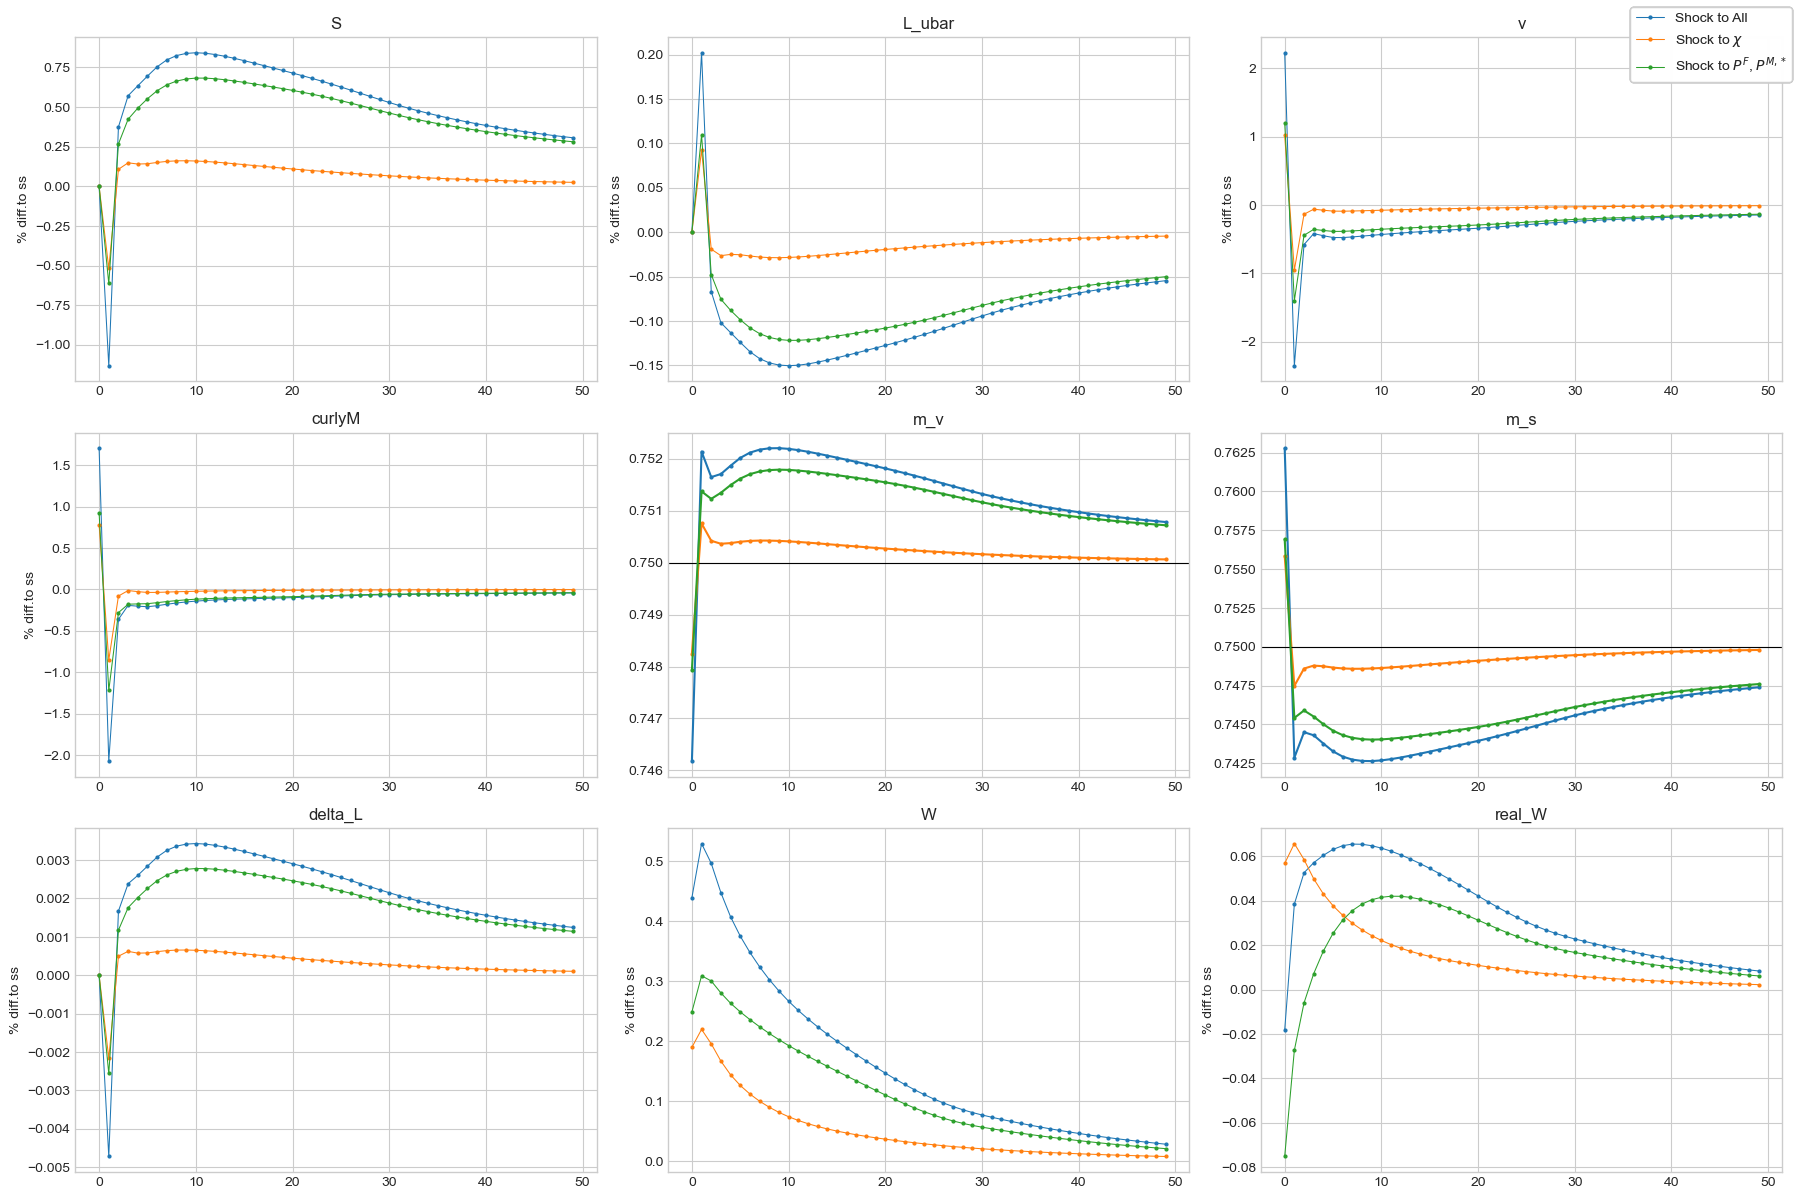

In [9]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['S','L_ubar','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### Capital accumulation

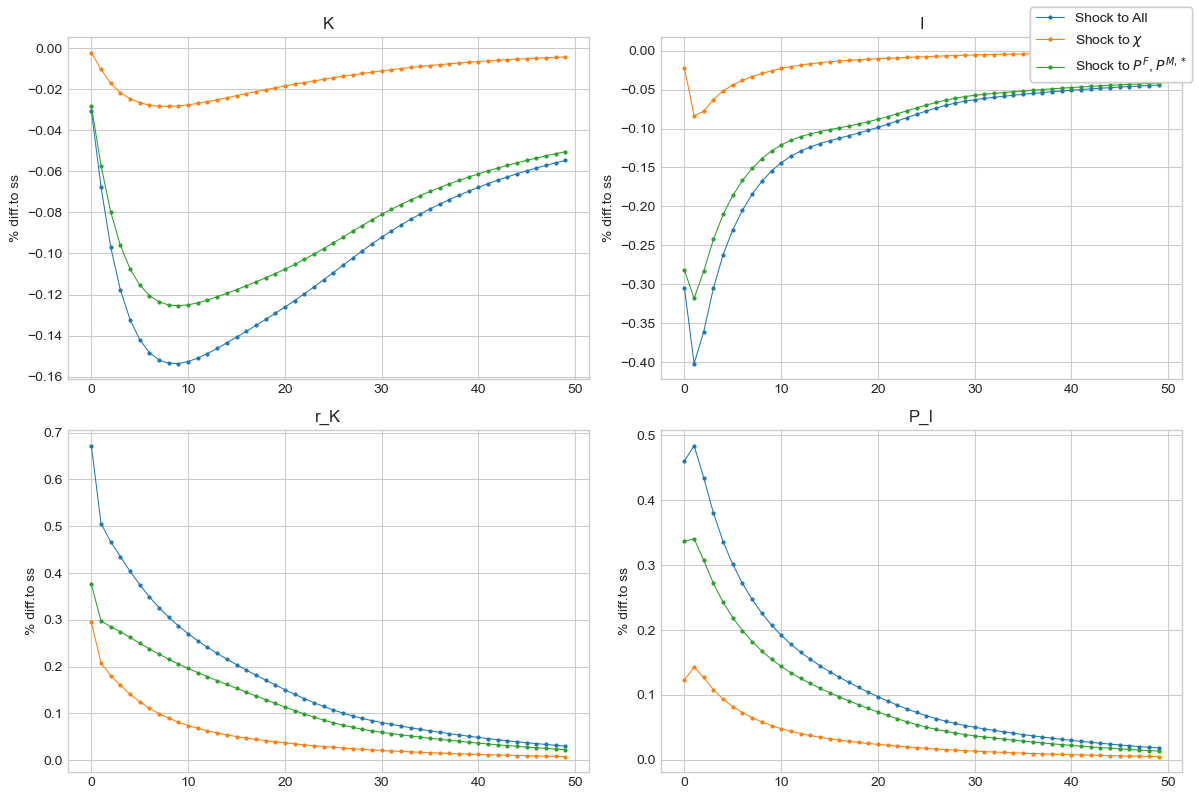

In [10]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['K','I','r_K','P_I'],ncol=2)

### Production firms

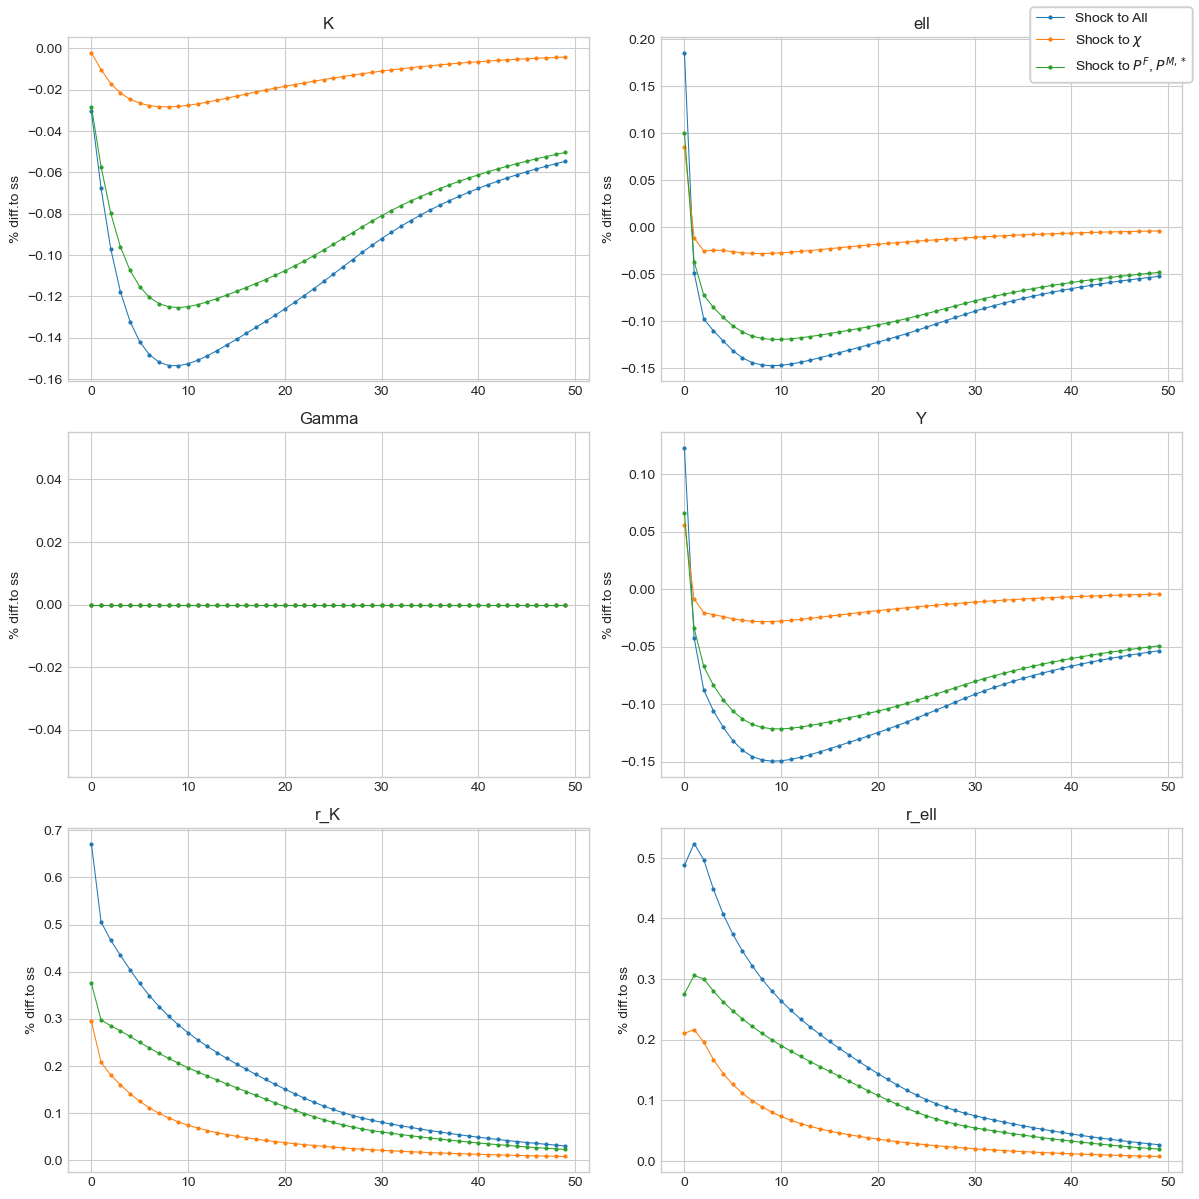

In [11]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['K','ell','Gamma','Y','r_K','r_ell'],ncol=2)

### Phillips curve

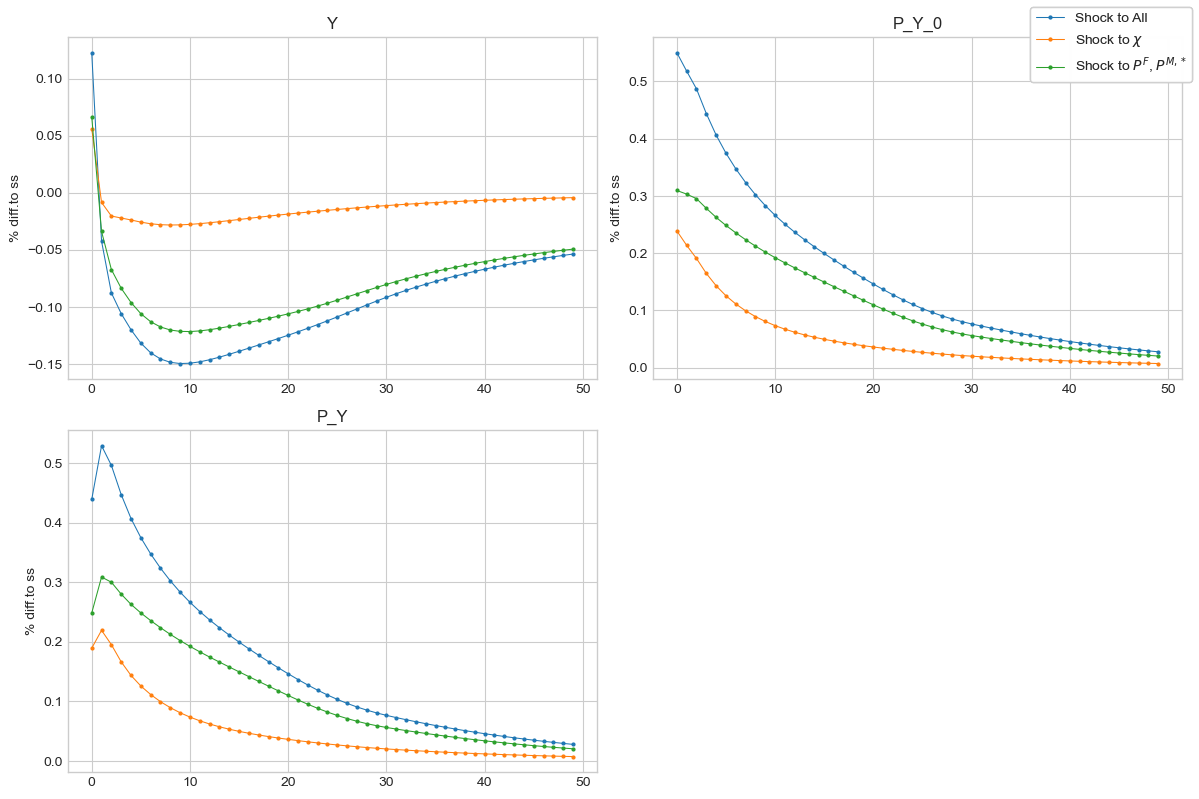

In [12]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['Y','P_Y_0','P_Y'],ncol=2)

### Government

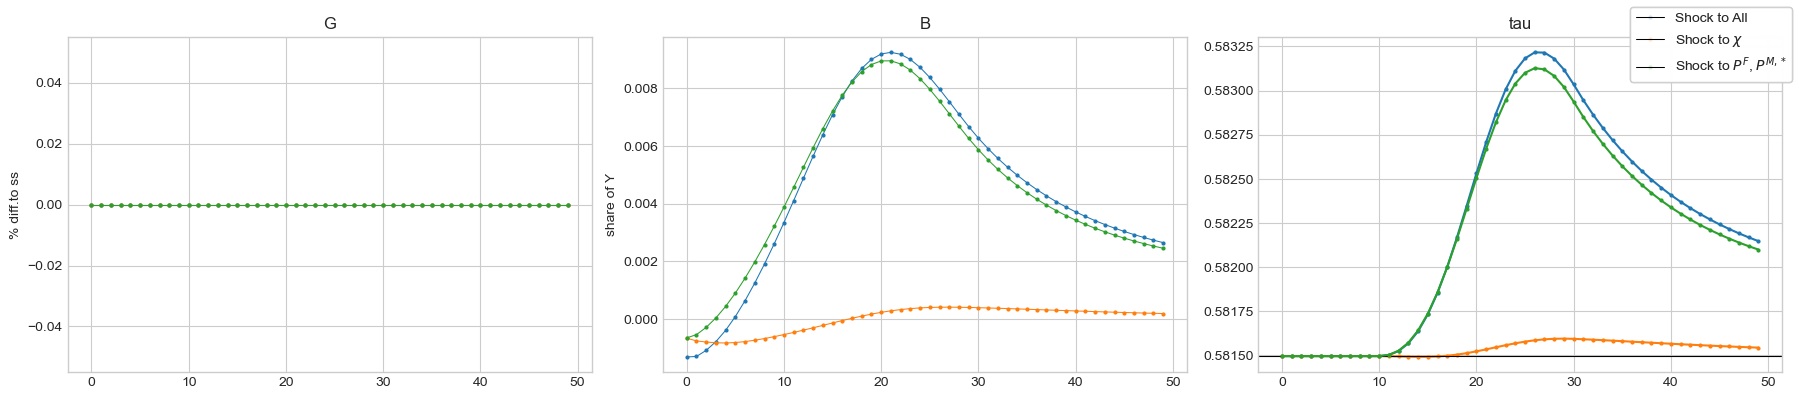

In [13]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['G','B','tau'],abs=['tau'],Y_share=['B'])

### Households - aggregate

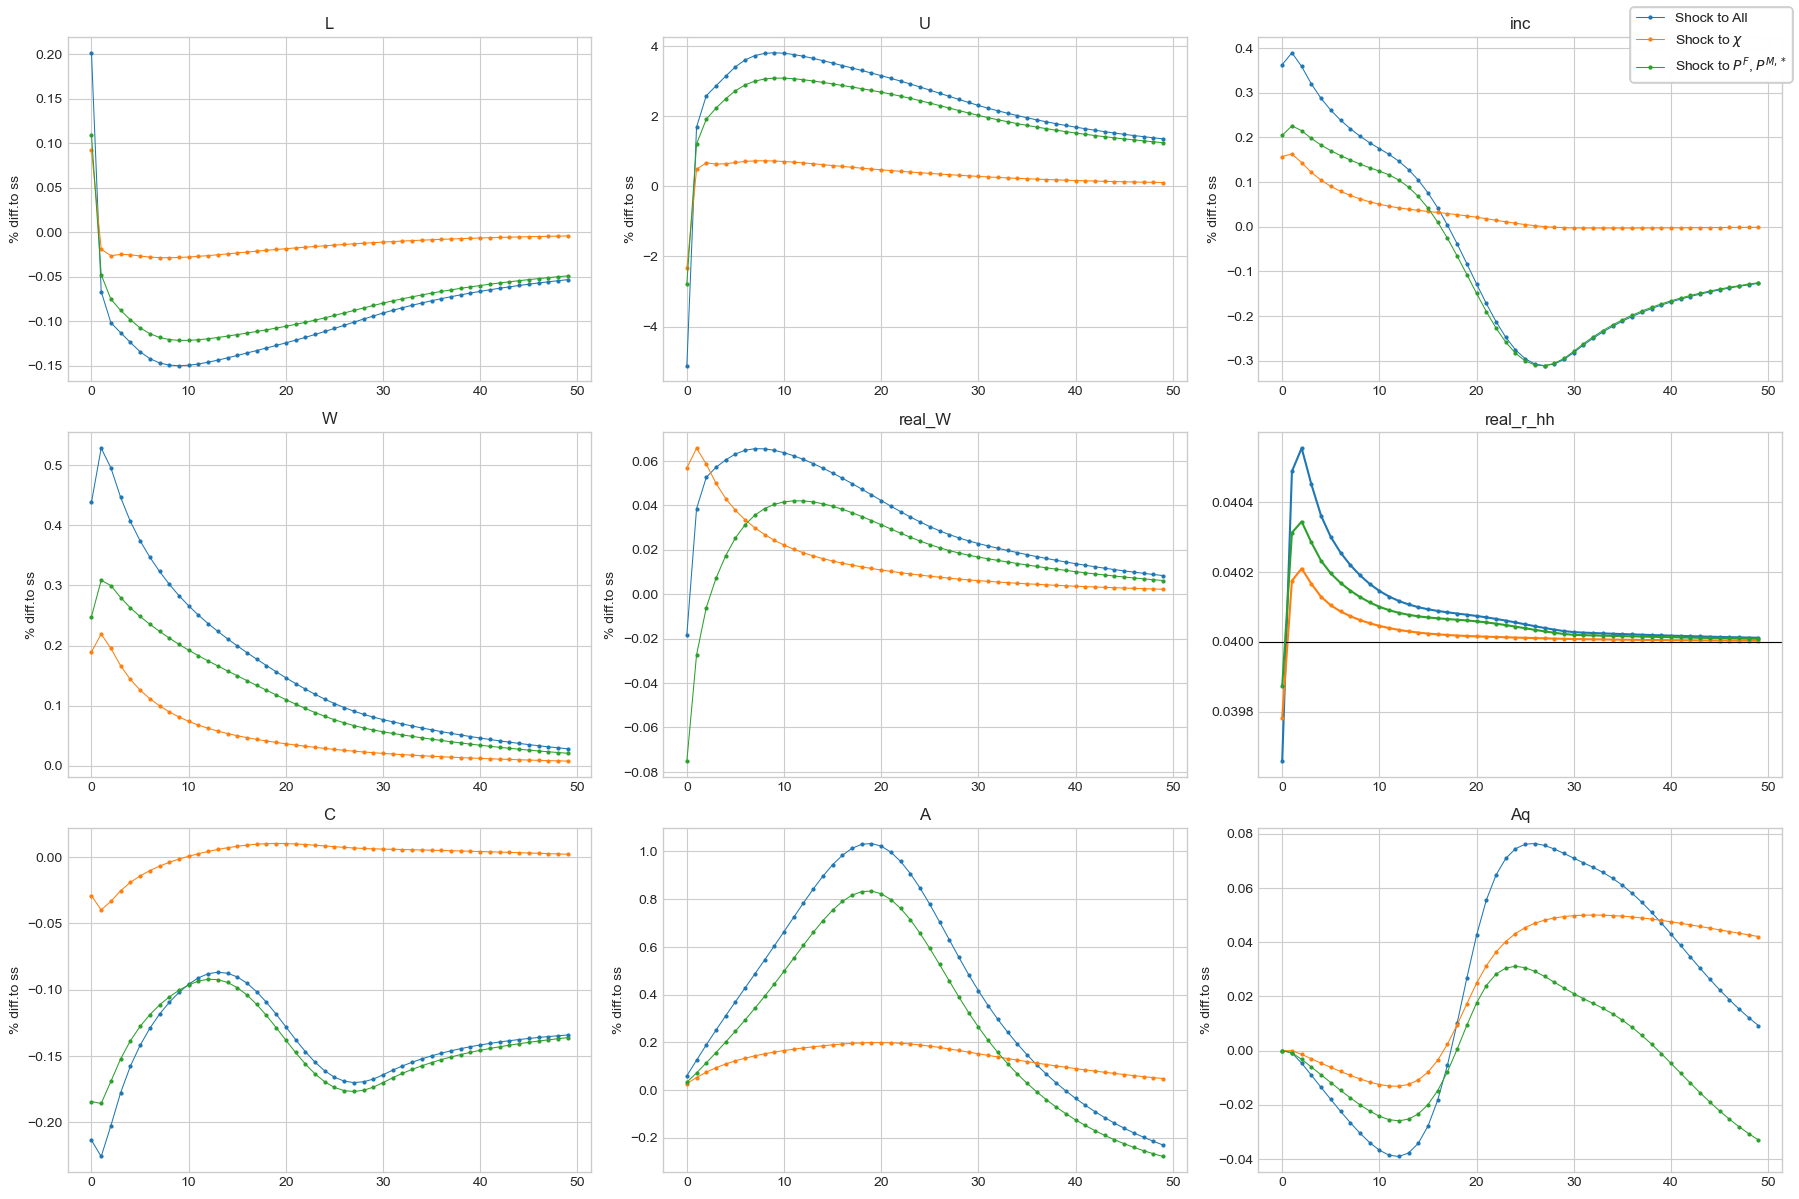

In [14]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['L','U','inc','W','real_W','real_r_hh','C','A','Aq'],ncol=3,abs=['real_r_hh'])

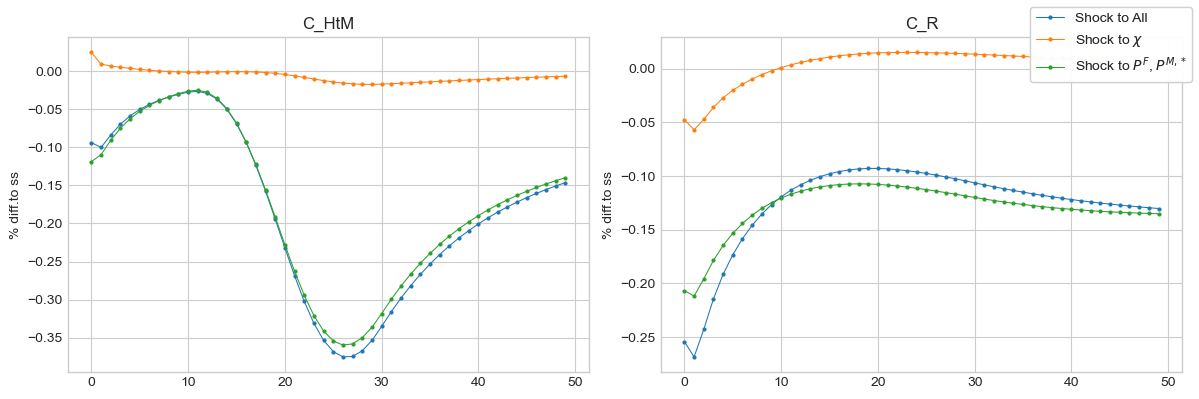

In [15]:
model.multi_shock_IRF(Modellist,['All',r'$\chi$',r'$P^F$, $P^{M,*}$'],varlist=['C_HtM','C_R'],ncol=2)

### Households - life-cycle

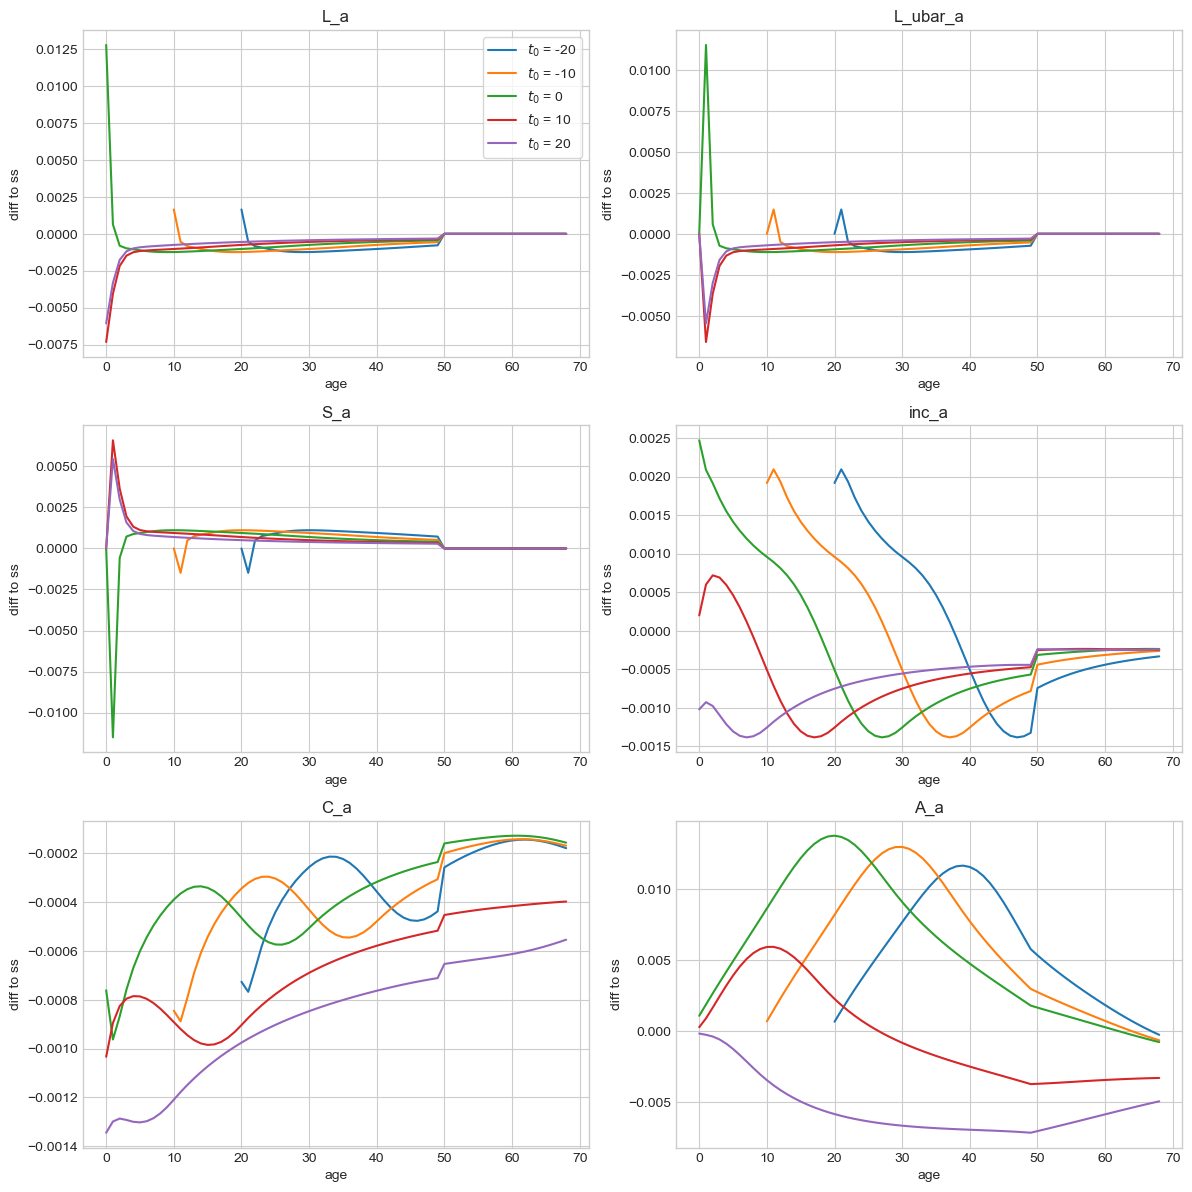

In [16]:
model.plot_IRF_hh(varlist=['L_a','L_ubar_a','S_a','inc_a','C_a','A_a'],t0_list=[-20,-10,0,10,20])